>
> # MaaSSim tutorial

 ### quickstart

In [33]:
6*6*6*7

1512

In [34]:
%load_ext autoreload
%autoreload 2
import random
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import os
import seaborn as sns
import pandas as pd
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib.pyplot as plt
plt.style.use(['science'])

In [36]:
path = "../../data/coevolution_res/finer2"
grid_res = list()
means = list()
alls = dict()
for filename in os.listdir(path):
        if filename.endswith('report.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            #filename = filename.replace('comm_rate','commrate').replace('shared_discount','shareddiscount')
            for h in filename[:-4].split("-")[1:]:
                field = h.split("_")[0]
                val = h.split("_")[-1]
                try: 
                    val = float(val)
                except:
                    pass
                df[field]= val  
            df['travel_decisions'] = df.travel_decisions.apply(lambda x: x.split("\n")[1:-1])
            df['travel_decisions'] = df['travel_decisions'].apply(lambda x: dict([(_.split(" ")[0],int(_.split(" ")[-1])) for _ in x]))
            df['out'] = df.travel_decisions.apply(lambda x: x.get('out',0))
            df['rh'] = df.travel_decisions.apply(lambda x: x.get('rh',0))
            df['rp'] = df.travel_decisions.apply(lambda x: x.get('rp',0))
            df['filename'] = filename.split("/")[-1]
            df.columns = [_.replace("_"," ") for _ in df.columns]
            df['share trav'] = df['n trav']/df.nP
            df['share drivers'] = df['n drivers']/df.nV
            df['share learned rp'] = df['learned rp']/df.nP
            df['share learned rh'] = df['learned rh']/df.nP
            df['share learned drivers'] = df['learned drivers']/df.nV
        
            means.append(df[df.day>=(df.day.max()-5)].mean())
            grid_res.append(df)
            alls[filename] = df
            
means = pd.concat(means, axis = 1).T.reset_index()
grid_res = pd.concat(grid_res)
grid_res.nV=grid_res.nV.astype(int)
grid_res.nP=grid_res.nP.astype(int)
means.nV=means.nV.astype(int)
means.nP=means.nP.astype(int)
means['share out'] = means['out']/means.nP
means['share rh'] = means['rh']/means.nP
means['share rp'] = means['rp']/means.nP
means['share drivers'] = means['n drivers']/means.nV
grid_res['$c$'] = grid_res['comm rate']
grid_res['$p$'] = grid_res['discount']
means['$c$'] = means['comm rate'].round(2)
means['$p$'] = means['discount'].round(2)
df.head()

,day,nP,nV,comm rate,discount,travel decisions,n trav,n drivers,fare,commision,...,dt,out,rh,rp,filename,share trav,share drivers,share learned rp,share learned rh,share learned drivers
0,0,1100.0,60.0,1.1,0.2,"{'out': 435, 'rh': 308, 'rp': 357}",665,60,0.0000,0.0000,...,report,435,308,357,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.604545,1.000000,0.000000,0.000000,0.0
1,1,1100.0,60.0,1.1,0.2,"{'out': 453, 'rh': 323, 'rp': 324}",647,34,0.0000,0.0000,...,report,453,323,324,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.588182,0.566667,0.000000,0.000000,0.0
2,2,1100.0,60.0,1.1,0.2,"{'out': 513, 'rh': 282, 'rp': 305}",587,43,3333.2628,239.1816,...,report,513,282,305,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.533636,0.716667,0.002727,0.002727,0.0
3,3,1100.0,60.0,1.1,0.2,"{'out': 527, 'rh': 286, 'rp': 287}",573,42,3232.2780,194.4810,...,report,527,286,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.520909,0.700000,0.010000,0.011818,0.0
4,4,1100.0,60.0,1.1,0.2,"{'out': 539, 'rh': 274, 'rp': 287}",561,46,3187.0468,196.9380,...,report,539,274,287,BIG-nP_1100-nV_60-comm_rate_1.1-shared_discoun...,0.510000,0.766667,0.020000,0.044545,0.0


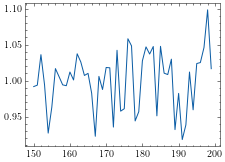

In [47]:
report = grid_res[(grid_res.nP == 1300) & (grid_res.nV == 40) & (grid_res.discount == 0.2) & (grid_res['comm rate'] == 0.7)]   
df = report.iloc[150:].commision
(df/df.mean()).plot()

nP:900 	 nV:50 	 p:0.1 	 c:0.7


Failed to find a Ghostscript installation.  Distillation step skipped.


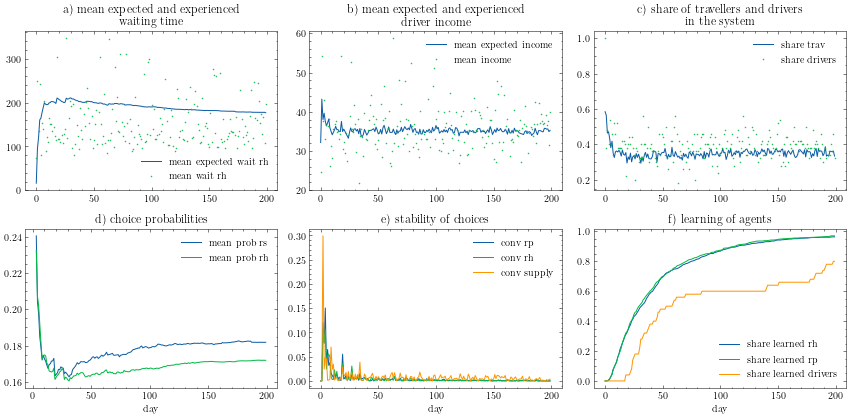

In [58]:
def plot_evol(grid_res,
              nP = 700,
              nV = 10,
              discount = 0,
              comm_rate = 0.7):
    print('nP:{} \t nV:{} \t p:{} \t c:{}'.format( nP, nV, discount, comm_rate))
    def sct(cols, ax, title):
        report[cols[1]].plot(ax=ax, title = title, lw = 1, label = cols[1])
        report[cols[0]].plot(ax=ax, style = '.', ms = 1, label = cols[0])
        ax.legend()
        
    
    report = grid_res[(grid_res.nP == nP) & (grid_res.nV == nV) & (grid_res.discount == discount) & (grid_res['comm rate'] == comm_rate)]
    #report.columns  = [_.replace("_"," ") for _ in report.columns]
    #report['share trav'] = report['n trav']/report.nP
    #report['share drivers'] = report['n drivers']/report.nV
    #report['share learned rp'] = report['learned rp']/report.nP
    #report['share learned rh'] = report['learned rh']/report.nP
    #report['share learned drivers'] = report['learned drivers']/report.nV
    fig, ax = plt.subplots(2,3, figsize = (12,6))
    ax = ax.flatten()
    sct(['mean wait rh','mean expected wait rh'], ax[0], title = 'a) mean expected and experienced  \nwaiting time')
    #report[['mean wait rh']].plot(ax=ax[0], style = '.', ms = 1)
    #sct(['mean wait rp','mean expected wait rp'], ax[1], title = 'mean expected and experienced \nwait time pooled ride')
    #sct(['mean travel rp','mean expected travel rp'], ax[2], title = 'mean expected and experienced \n travel time pooled ride')
    sct(['mean income','mean expected income'], ax[1],  title = 'b) mean expected and experienced \n driver income')
    sct(['share drivers','share trav'], ax[2], title = 'c) share of travellers and drivers \n in the system')
    report[report.day>2][['mean prob rs','mean prob rh']].plot(ax=ax[3], title = 'd) choice probabilities', lw = 1)
    report[['share learned rh','share learned rp','share learned drivers']].plot(ax=ax[5], title = 'f) learning of agents', lw = 1)
    report[['conv rp','conv rh','conv supply']].plot(ax=ax[4], title = 'e) stability of choices', lw =1 )
    #report['share rp'] = report['rp']/report.nP
    #sct( ['n actually sharing', 'shareability'], ax[8], title = 'efficiency of sharing (shareability)')
    #report[['fare','commision','income']].plot(ax=ax[6], title = 'fares, revenues and commissions')
    #ax[9].set_ylim((0,4000))
    for i in [3,4,5]:
        ax[i].set_xlabel('day')
    #fig.suptitle('learning evolution')
    fig.tight_layout() 
    plt.savefig('evol.eps')
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.1, comm_rate = 0.7)

nP:700 	 nV:10 	 p:0 	 c:0.7


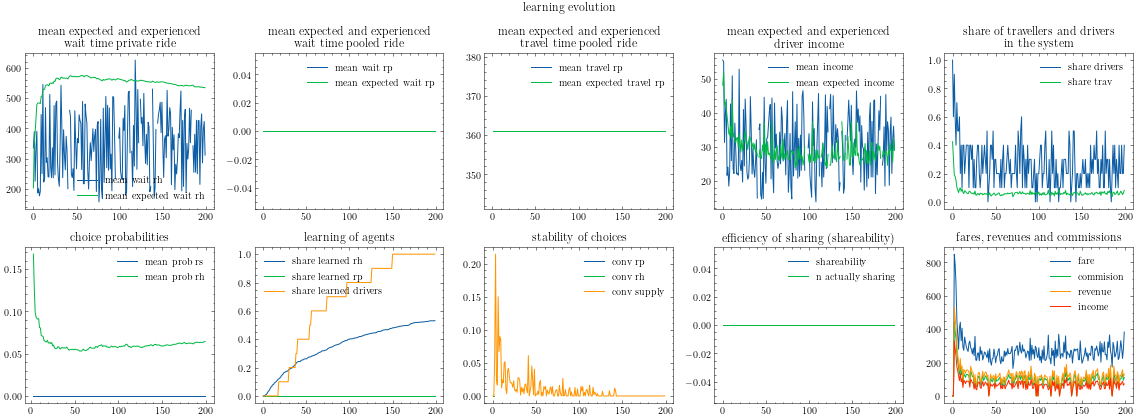

In [7]:
plot_evol(grid_res, nP = 700, nV = 10, discount = 0, comm_rate = 0.7)

nP:700 	 nV:10 	 p:0.2 	 c:0.7


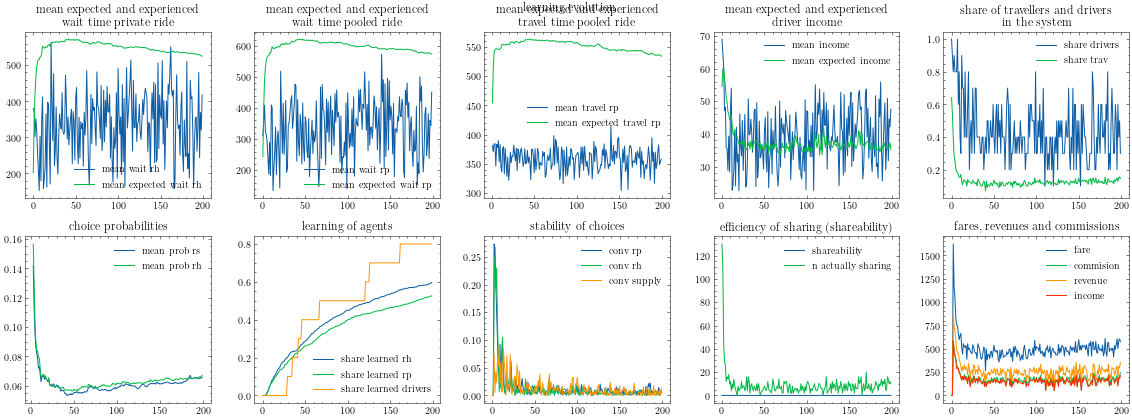

In [22]:
plot_evol(grid_res, nP = 700, nV = 10, discount = 0.2, comm_rate = 0.7)

nP:700 	 nV:10 	 p:0.2 	 c:0.1


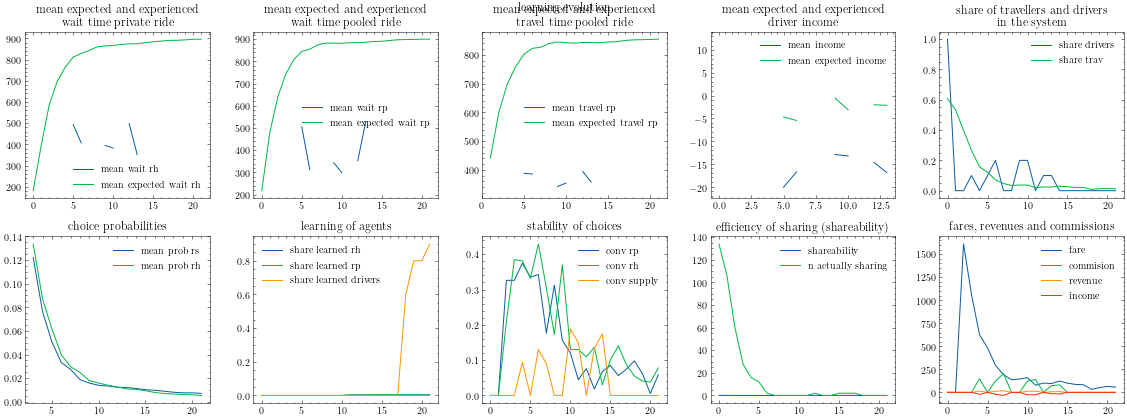

In [23]:
plot_evol(grid_res, nP = 700, nV = 10, discount = 0.2, comm_rate = 0.1)

nP:700 	 nV:10 	 p:0.2 	 c:0.5


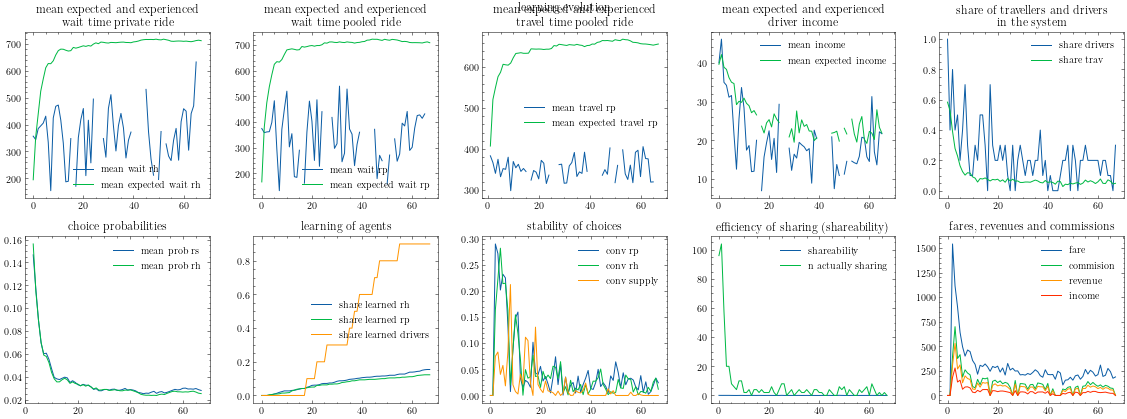

In [24]:
plot_evol(grid_res, nP = 700, nV = 10, discount = 0.2, comm_rate = 0.5)

nP:700 	 nV:50 	 p:0.2 	 c:0.5


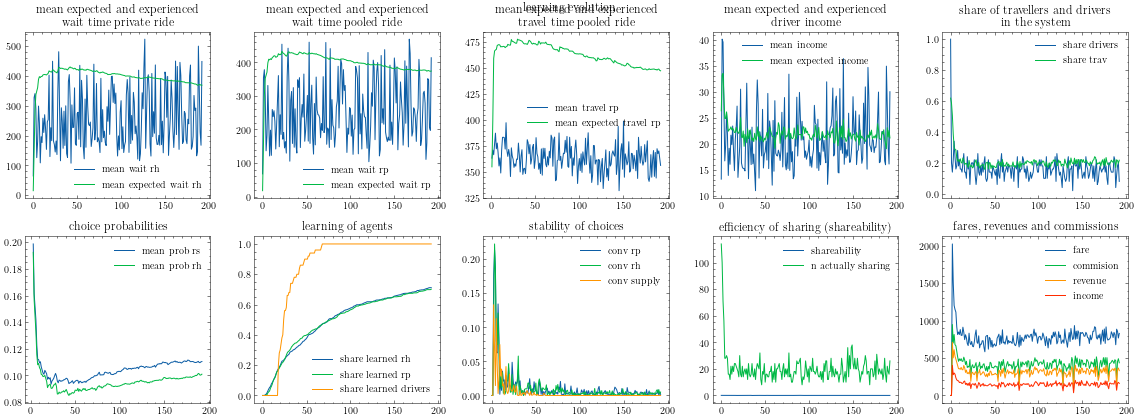

In [26]:
plot_evol(grid_res, nP = 700, nV = 50, discount = 0.2, comm_rate = 0.5)

nP:900 	 nV:50 	 p:0.4 	 c:0.7


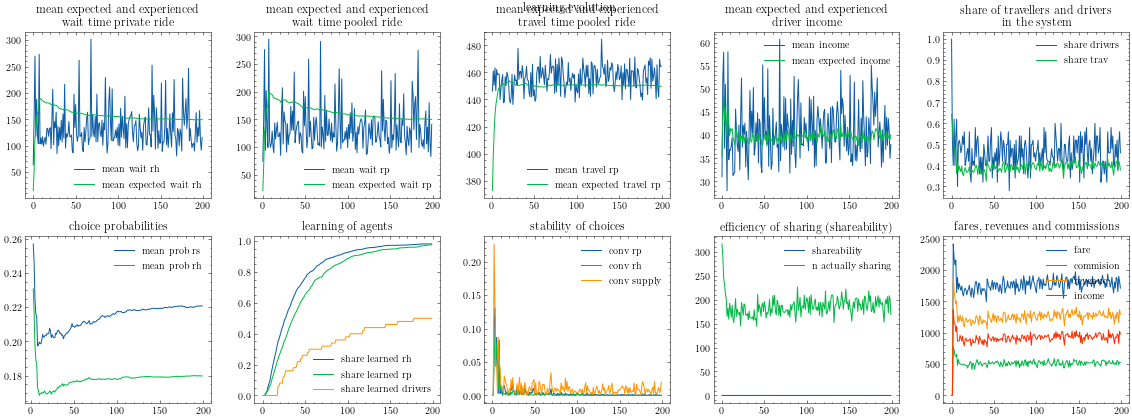

In [27]:
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.4, comm_rate = 0.7)

nP:900 	 nV:50 	 p:0.3 	 c:0.7


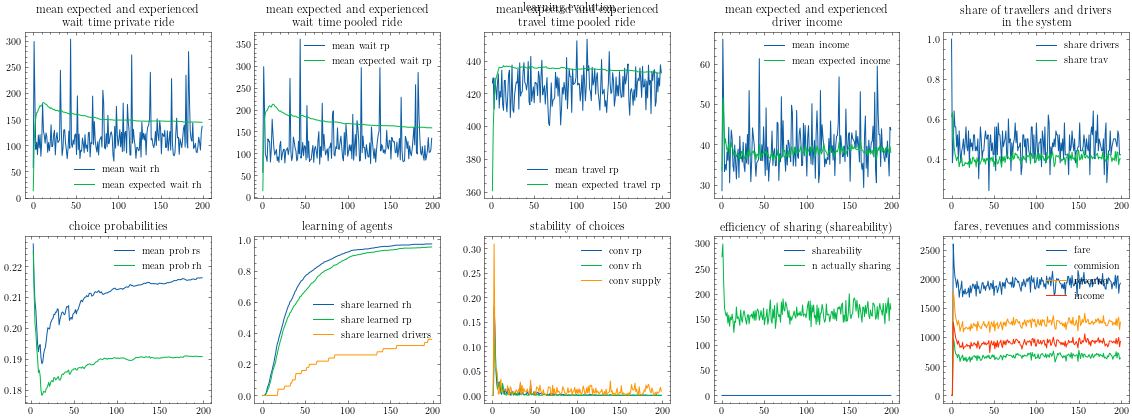

In [28]:
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.3, comm_rate = 0.7)

nP:900 	 nV:50 	 p:0.2 	 c:0.7


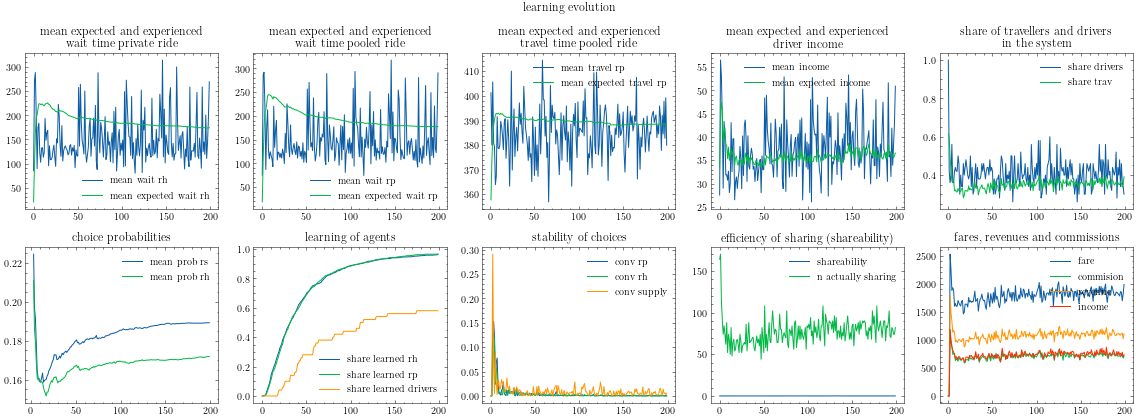

In [6]:
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.2, comm_rate = 0.7)

nP:900 	 nV:50 	 p:0.1 	 c:0.7


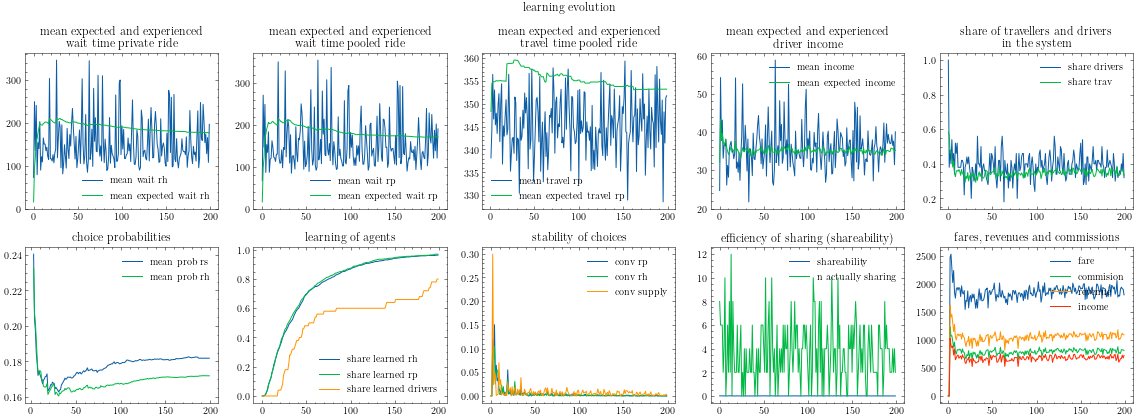

In [8]:
plot_evol(grid_res, nP = 900, nV = 50, discount = 0.1, comm_rate = 0.7)

nP:1300 	 nV:40 	 p:0.1 	 c:0.7


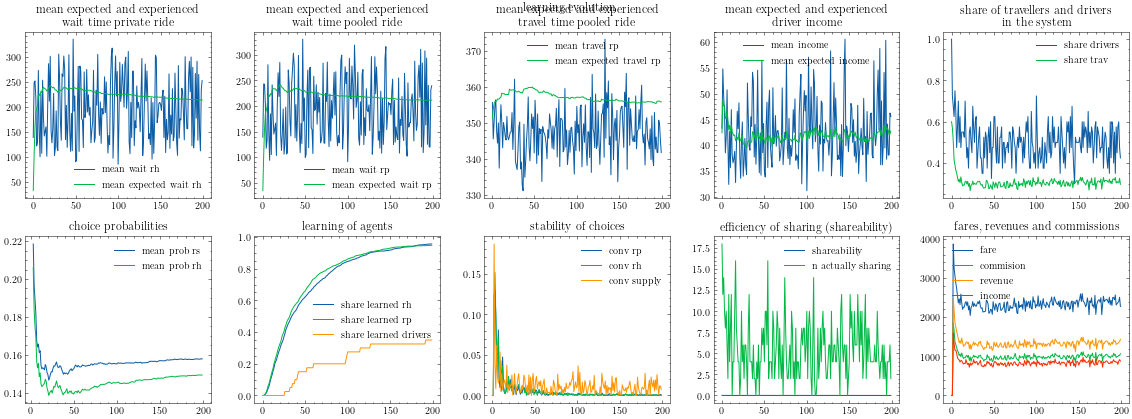

In [32]:
plot_evol(grid_res, nP = 1300, nV = 40, discount = 0.1, comm_rate = 0.7)

In [1]:
plot_evol('../../data/coevolution_res/evols/300_90.csv')

NameError: name 'plot_evol' is not defined

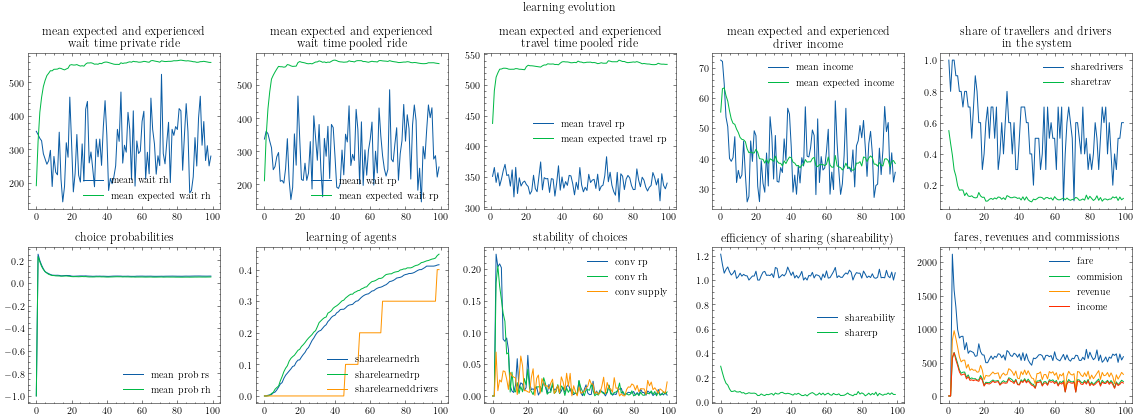

In [21]:
plot_evol('../../data/coevolution_res/evols/900_10.csv')

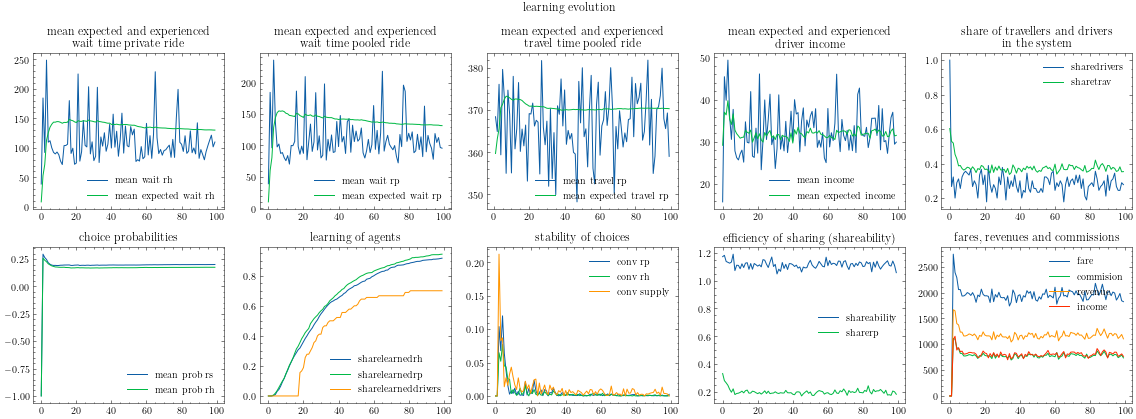

In [22]:
plot_evol('../../data/coevolution_res/evols/900_90.csv')

prepare

In [24]:
5*5*5*4

500

In [6]:
import pandas as pd

In [10]:
df = pd.read_csv('../../data/coevolution_res/evols/300_10.csv')

df['out'] = df.travel_decisions.apply(lambda x: int(x.split("\n")[1].split(" ")[-1]))
df['rh'] = df.travel_decisions.apply(lambda x: int(x.split("\n")[2].split(" ")[-1]))
df['rp'] = df.travel_decisions.apply(lambda x: int(x.split("\n")[3].split(" ")[-1]))
report = df

In [11]:
report.columns  = [_.replace("_"," ") for _ in report.columns]

In [12]:
report.columns

Index(['Unnamed: 0', 'day', 'nP', 'nV', 'comm rate', 'discount',
       'travel decisions', 'n trav', 'n drivers', 'fare', 'commision',
       'revenue', 'income', 'mean wait rh', 'mean wait rp', 'mean travel rp',
       'mean income', 'mean expected wait rh', 'mean expected wait rp',
       'mean expected travel rp', 'mean expected income', 'mean prob rh',
       'mean prob rs', 'n exp', 'learned rh', 'learned rp', 'learned',
       'learned drivers', 'conv rp', 'conv rh', 'conv supply', 'shareability',
       'unserved', 'out', 'rh', 'rp'],
      dtype='object')

In [14]:
#sim.report['out'] = sim.report['travel decisions'].apply(lambda x: x['out'])
#sim.report['rh'] = sim.report['travel decisions'].apply(lambda x: x['rh'])
#sim.report['rp'] = sim.report['travel decisions'].apply(lambda x: x['rp'])
report['sharetrav'] = report['n trav']/report.nP
report['sharedrivers'] = report['n drivers']/report.nV
report['sharelearnedrp'] = report['learned rp']/report.nP
report['sharelearnedrh'] = report['learned rh']/report.nP
report['sharelearneddrivers'] = report['learned drivers']/report.nV

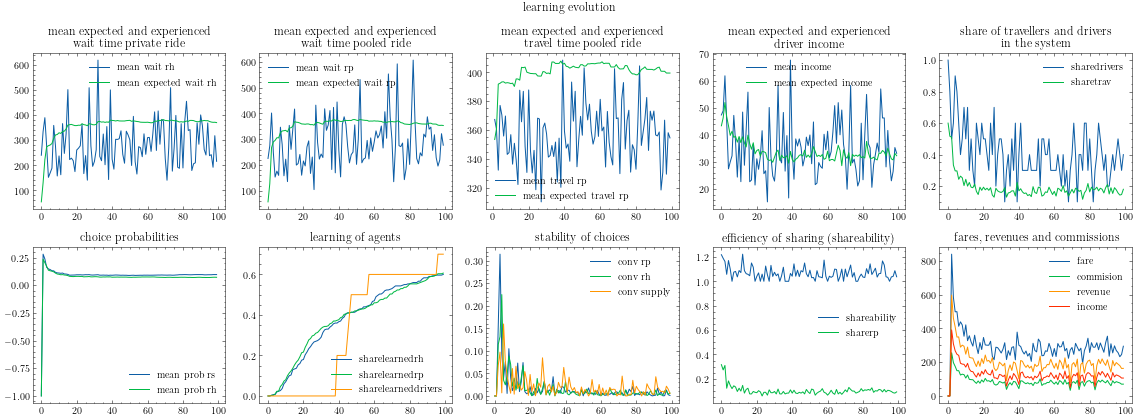

In [15]:

fig, ax = plt.subplots(2,5, figsize = (16,6))
ax = ax.flatten()
report[['mean wait rh','mean expected wait rh']].plot(ax=ax[0], title = 'mean expected and experienced  \nwait time private ride')
report[['mean wait rp','mean expected wait rp']].plot(ax=ax[1], title = 'mean expected and experienced \nwait time pooled ride')
report[['mean travel rp','mean expected travel rp']].loc[1:].plot(ax=ax[2], title = 'mean expected and experienced \n travel time pooled ride')
report[['mean income','mean expected income']].plot(ax=ax[3],  title = 'mean expected and experienced \n driver income')
report[['sharedrivers','sharetrav']].plot(ax=ax[4], title = 'share of travellers and drivers \n in the system')
report[['mean prob rs','mean prob rh']].plot(ax=ax[5], title = 'choice probabilities')
report[['sharelearnedrh','sharelearnedrp','sharelearneddrivers']].plot(ax=ax[6], title = 'learning of agents')
report[['conv rp','conv rh','conv supply']].plot(ax=ax[7], title = 'stability of choices' )
report['sharerp'] = report['rp']/report.nP
report[['shareability', 'sharerp']].plot(ax=ax[8], title = 'efficiency of sharing (shareability)')
report[['fare','commision','revenue','income']].plot(ax=ax[9], title = 'fares, revenues and commissions')
fig.suptitle('learning evolution')
fig.tight_layout()

In [61]:
sim.inData.passengers.platforms = sim.inData.passengers.apply(
            lambda x: sim.inData.platforms[sim.inData.platforms.name == x.travel_decision].index[0], axis=1)
sim.inData.requests['platform'] = sim.inData.passengers.platforms
sim.inData.requests['shareable'] = sim.inData.requests.platform.apply(lambda x: x >= 0)
sim.inData.sblts.requests['platform'] = sim.inData.requests['platform']  # bookkeeping
sim.inData.sblts.requests['shareable'] = sim.inData.requests['shareable']  # bookkeeping

In [64]:
params.shareability.without_matching

True

In [59]:
sim.inData.passengers.groupby('platforms').size()

platforms
-2    262
-1    126
 0    112
dtype: int64

In [60]:
sim.inData.passengers.groupby('travel_decision').size()

travel_decision
out    262
rh     126
rp     112
dtype: int64

-----